<html>
<head>
  <title>Introduction</title>
  <style>
    h1 {
      color: orange;
    }
    .center {
      margin: auto;
      width: 50%;
      border: 0px;
      padding: 10px;
    }
  </style>
</head>
<body>

  <h1 class="center">Name: <b>Uday Bhardwaj</b></h1>
  <h1 class="center">Id: <b>12241910</b></h1>
  <h1 class="center">Assignment: <b>4</b></h1>

</body>
</html>

# Modules and Constants used

In [1]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt

# Question 1

## _Introduction_

### Consider a random sample $ X_1 , X_2 , . . . , X_{10000} $ drawn from a Poisson distribution with mean θ. Show that the critical region C defined by $ \sum X_i $ ≥ 3 for i $ \epsilon $ [1,10000] is a best critical region for testing $ H_0 \; : \;  \theta $=0.2 against $H_1$ : θ = 0.6. Determine, for this test, the significance level α and the power at θ = 0.6.
  1. #### Write a Python function to generate a random sample of size 10000 from a Poisson distribution with mean θ.
  2. #### Define the critical region C as the sum of the sample being greater than or equal to 3.
  3. #### Perform hypothesis testing by comparing the critical region with the significance level α.
  4. #### Calculate the power of the test at θ = 0.6. Ensure to use Python from scratch to solve the given problem statement.

## _Functions Used_

In [2]:
# ----General Functions----------
def mean( dataset: np.array, n: int )->float:
  """_Summary_
      This calculates the mean of the dataset which is provided.
  :_Args_
    dataset (np.array): This is the dataset for which the mean is to be calculated.
  :

  """
  summation:float= sum(dataset)
  return (summation/n)

def variance( dataset: np.array, n: int, mean: float )->float:
  """
  _Summary_
    This function calculates and returns the variance of the dataset. 
    :_Args_
      dataset(numpy array): This is the dataset for which the variance is to be calculated.
      n(int): This is the size of the dataset given.

    :_Returns_
      float: Variance of the datset
  """
  squared_dataset= np.array( [ np.power((x-mean), 2) for x in dataset ])
  var= sum(squared_dataset)/n

  return var

# -------------------------------------------------------  UNIVARIATE  -----------------------------------------------------------------



# Function which follows altered cdf of Poisson distribution
def changed_Poisson(X:int, lamda:int)->float:
	"""This is a function which returns the poission distribution."""

	f_x = ( (lamda**X)/mt.factorial(X) )
	return f_x

# Function which follows the altered cdf of Poisson distribution
def Poisson_cdf( lim:int , LAMDA:int )->np.array:
  """_summary_

  Args:
      lim (int): This is the limit upto which the numpy array is to be made

  Returns:
      np.array: This is the numpy array which has the index number as the realisation of the random variable and the value in the array as the cdf upto that value.

  It returns an array which contains the cdf value for the (index + 1) range.
  """

  arr =[ 0 ]
  for i in range(1,lim,1):
    arr.append( arr[i-1] + changed_Poisson(i,LAMDA) )
  cdf=np.array(arr)
  
  return cdf

# Function which works as the inverse for the Poisson distribution
def Poisson_value( cdf:np.array, prob:float ,lamda:int )->int:
  """_summary_

  Args:
    cdf (np.array): This is the cdf array for a particular distribution.
    prob (float): This is an specific probability value which is in the range of 0 to 1. 

  Returns:
    int: This is the realisation of the random variable.
  """

  sz: int =len(cdf)
  for i in range(sz):
    if( prob/mt.exp(0-lamda) < cdf[i]):
      return i
    
  return 0

# Function which gives randomly generated numbers which follow gaussian distribution
def ITS_poisson( num_samples:int, prestored_samples:int, lamda:int )->np.array:
  """_Summary_
  
  Args:
    num_samples (int): This is the toal number of samples taken for the transformation from uniform to gaussian function.
    prestored_samples (int): This is the total number of prestored samples taken.
    lamda (int): This is the lamda taken for the gaussian distribution.

  Returns:
    np.array: This is the array which contains the transformed uniform random number which now follow normal/gaussian distribution 
  """
  
  CAL= Poisson_cdf( prestored_samples ,lamda )
  
  # Generating uniform random numbers
  dp: np.array = np.random.uniform(0, 1, num_samples)
  dataset:np.array = np.array( [ Poisson_value(CAL,i,lamda) for i in dp ] )
  
  return dataset

## _Part 1_

### _Methodology_

- #### We want to get the cdf of random variable for a large number of realisations of the random variable `X` which follows the Poisson distibution.

- #### The Poisson distribution can be represented by the pmf as:
#### $$  P(x,\lambda)\;=\;\frac{\lambda^{x}\;e^{-\lambda}}{x!}  $$

- #### However for the ease of calculation, we have altered the pmf slightly[for easy computation] by taking it as:
#### $$  P(x,\lambda)\;=\;\frac{\lambda^{x}}{x!}  $$

- #### The extra `exponential term` has been added while taking the probability as the input.

- #### In the code mentioned below, the functions pertaining to each task has been documented in a well-defined manner.

- #### The value of $ \lambda $ taken here by me is 10. Even from this value, we can see that the poisson distribution starts to resemble the normal distribution.

### _Code_

In [3]:
prestored_samples2 =2000

LAMDA2= 1;    SIZE1= 10000
org_mean1= 1

h0_1= 0.2; h1_1= 0.5
# Generating the cdf of the gaussian distribution
CDF2 =  Poisson_cdf( prestored_samples2, LAMDA2)* mt.exp(0-LAMDA2)

# Generating the dataset
data1= ITS_poisson( SIZE1, prestored_samples2, LAMDA2)
mean1= mean(data1, SIZE1); var1= variance(data1, SIZE1, mean1)
data1

array([1, 1, 1, ..., 0, 1, 1])

## _Part 2_

### _Methodology_

- #### The Critical region is defined as a region C in higher dimensions in which the hypothesis $ H_0 $ is rejected if the random sample $ X_1, X_2, ....., X_n $ lies in it.
  ##### Accepted when $ (X_1, X_2,......, X_n) \; \notin \; C $
  ##### Rejected when $ (X_1, X_2,......, X_n) \; \in \; C $

- #### There can be 2 types of errors while testing a hypothesis:
  1. ##### Type 1 error: When $ H_0 $ is correct but we have assumed it to be wrong. This provides us with the significance value $ \alpha $.
  2. ##### Type 2 error: When $ H_0 $ is wrong but we have taken it to be correct. This provides us with the OC(Operating Characteristic) or (1 - Power)

- #### Now, We define the critical region in a better manner:
  ##### $$  C = \{ \; (X_1, X_2,........, X_n) \; : \; |\bar{X} - \mu| > c \}   $$

- #### Here, we consider that the Null hypothesis $ H_0 $ is true and we find the significance level for the Type 1 error and We are checking it for the crictical region in which $ \Sigma_{i=1}^{n} {X_i} \geq 30000 $.

- #### This leads to the equation:
  ##### $$ \bar{X} \; \geq \; 3 $$

- #### We can simplify the equation for critical for critical region as:
  ##### $$ H_0: \bar{X}-0.2 \geq 2.8 \; and \; H_1: \bar{X}-0.6 \geq 2.4 $$

- #### Hence, the value of $ c_0 \; and \; c_1 $ comes out to be 2.8 and 2.4 respectively.

### _Code_

In [4]:
c0_1= mean1- 0.2; c1_1= mean1 - 0.6
print(f"The critical values from the null hypothesis and the alternate hypothesis has come out to be {c0_1} and {c1_1}")

The critical values from the null hypothesis and the alternate hypothesis has come out to be 0.7952999999999999 and 0.3953


## _Part 3_

### _Methodology_

  - #### Here, we assume that we have no information about the mean and take the case where we do not know about the variance of the sample too.

  - #### With the application of Central Limit Theorem, We take the assumption that the mean of all the Poisson samples follow the Normal distribution with unknown mean and variance.
  
  - #### The critical value can be found in the below manner:
    ##### $$  P_0 ( \; | \bar{X} - \mu{}_0 | > c  \; ) = \alpha $$ 

  - #### We can convert $\bar{X} $ to a standard normal variable through the below method:
    ##### $$  T= \frac{ \sqrt{n} (\bar{X} - \mu_0) }{ S } $$

  - #### Through this, we can derive the critical value:
    ##### $$ t_{\alpha/2} = \frac{c\sqrt{n}}{S} $$

### _Code_

In [5]:
from scipy.stats import t as t_dis

# Finding alpha for the null hypothesis
T1= mt.sqrt(SIZE1) * ( mean1 - h0_1 ) / mt.sqrt(var1)
t1= c0_1*mt.sqrt(SIZE1)/mt.sqrt(((var1/(SIZE1-1)))*(SIZE1))

print(f"The values of T and t for the equation presented are {T1} and {t1} respectively")
t_dis.cdf( T1,9999)

The values of T and t for the equation presented are 79.98408243931954 and 79.98008313521247 respectively


1.0

## _Part 4_

### _Methodology_

- #### For taking out the Power for the Alternate hypothesis, we first find out the Operating Characteristics.

- #### We define a term $ \beta $ as follows:
  ##### $$ \beta(\mu) = P_{\mu}(acceptance \; of \; H_1) $$
  ##### $$ P_{\mu}\{ \mid{ \frac{ \sqrt{n}(\bar{X}-\mu_{0}) }{S} } \mid \;\; \leq \;\; z_{\alpha/2} \} $$

- #### Solving this expression gives us the result:
  #### $$ \beta(\mu) = \phi{}( \frac{\mu_0 - \mu}{S/\sqrt{n}} \; + \; z_{\alpha/2}) - \phi{}( \frac{\mu_0 - \mu}{S\sqrt{n}} \; - \; z_{\alpha/2} ) $$

- #### In the above expression, $ \phi $ is the standard normal distribution function. The Expression for Power is as follows:
  ##### $$ Power = \; 1 \; - \; \beta{}(\mu) $$
   
- #### For the ease of calculation, we ignore the latter part in the calculation of $ \beta $ and we can write the remaining as follows:
  #### $$ \beta(\mu) = \phi{}( \frac{\mu_0 - \mu}{S/\sqrt{n}} \; + \; z_{\alpha/2}) $$
  #### $$ \beta(\mu) = P(Z > \frac{\mu_0 - \mu}{S/\sqrt{n}} \; + \; z_{\alpha/2} ) = P(Z < - ( \frac{\mu_0 - \mu}{S/\sqrt{n}} \; + \; z_{\alpha/2}  )) $$
  #### $$ \beta(\mu) = \phi(-z_{\beta})  $$

### _Code_

In [6]:
from scipy.stats import norm

C= (org_mean1 - mean1)* mt.sqrt(SIZE1) / mt.sqrt(var1)
upper2= C + t1; lower2= C - t1

beta= norm.cdf(-upper2)
print(f"The values for Beta and Power for the Alternate hypothesis are {beta} and {1-beta}.")

The values for Beta and Power for the Alternate hypothesis are 0.0 and 1.0.


## _Observations_

- #### The primary reason for this high value of Power can be considered due to higher value for $ \frac{ \sqrt{n} }{ S } $

# Question 2

## _Introduction_

### Consider a random sample $ X_1 , X_2 , . . . , X_{100} $ drawn from a normal distribution with mean $ \mu $ and standard deviation $ \sigma $. Show that the critical region C defined by X̄ ≥ 20 is a best critical region for testing  $ H_0 : µ = 15 \; against \; H_1 : µ = 18$.  Determine, for this test, the significance level α and the power at µ = 18.
  1. #### Write a Python function to generate a random sample of size 100 from a normal distribution with mean µ and standard deviation σ.
  2. #### Define the critical region C as the sample mean (X̄) being greater than or equal to 20.
  3. #### Perform hypothesis testing by comparing the critical region with the significance level α.
  4. #### Calculate the power of the test at µ = 18.


## _Functions Used_

In [7]:
def BM_technique( N:int, mean:float, variance:float )->np.array:
  """_Summary_
      This implements the Box-Muller technique to get the dataset which follows the Gaussian Distribution.

    _Args_
      
    
    _Returns_
      np.array: It is the numpy array which contains the data related to the point which follow the Gaussian Distribution.
    
  """
  # Taking random samples which follow uniform distribution
  u1= np.random.uniform(0, 1, N)
  u2= np.random.uniform(0, 1, N)

  # Applying the Box-Muller technique to get the variable following the Normal distribution
  R= np.sqrt(-2* np.log(u1) )
  cost= np.cos(2 * np.pi * u2 )

  Z= R*cost
  
  # Converting the variable from Standard Normal variable to a normal variable with specific mean and variance 
  X= (Z* np.sqrt(variance)) + mean
  return X

## _Part 1_

### _Methodology_

- #### The main idea behind the method used is to generate a dataset from uniform distribution which follows Gaussian distribution.

- #### This is done with the help of `Box-Muller Technique` which is defined as follows:
  
  - #### It can be defined as a alternative way to the method of inverse transform sampling. It generates numbers which follow _Standard Normal Distribution_.
  
  - #### $ U_1 \; and \; U_2 $ are the parameters taken for radius and angle which are the samples following uniform distribution. We transform these variables to Normal variables using the _Box-Muller Technique_.
  
  - #### The formula used is as follows:
    $$ Z_1 = R\;\cos{(\theta)}\;=\;\sqrt{-2\ln{U_1}} \cos{2\pi U_2}   $$
  
  - #### $ Z_1 $ follows standard normal distribution.
  
  - #### The derivation for the Box-Muller technique involves the use of geometry and Pythogoras theorem. There are reference given for the Box-Muller technique.

- #### We change the standard normal distribution to the Normal Distribution with given $ \mu \; and \; \sigma $.
  $$  X = \mu_1 + \sqrt{ \sigma_1 }\;\;z_1   $$

### _Code_ & _Visualisation_

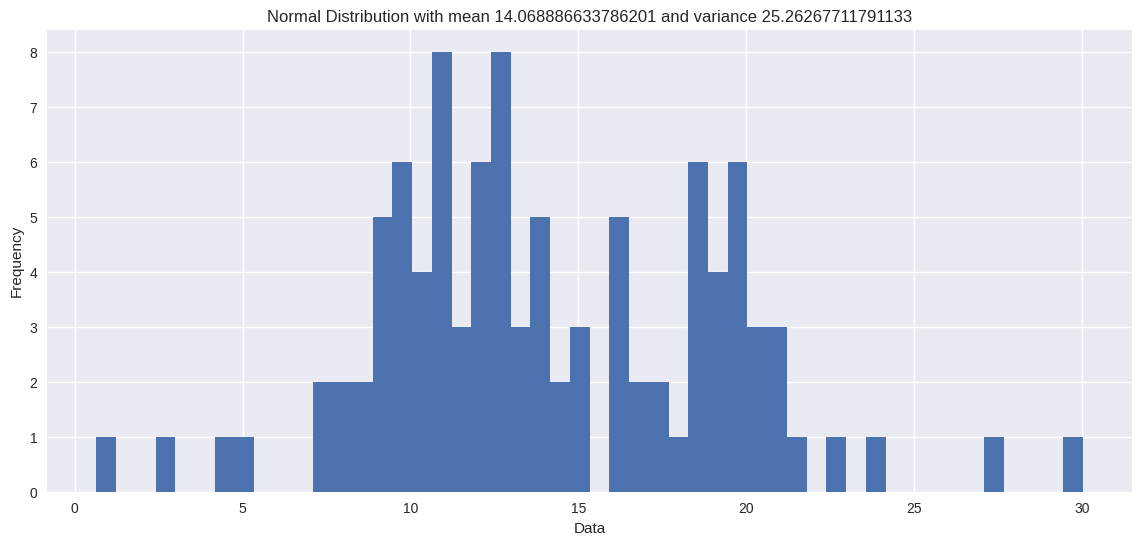

In [8]:
SIZE2= 100; org_mean2= 15; org_var2= 25

DATA2= BM_technique(SIZE2, org_mean2, org_var2)
DATA2

mean2= mean(DATA2, SIZE2); var2= variance(DATA2, SIZE2, mean2)

# Setting style
plt.figure( figsize=(14,6))
plt.style.use( 'seaborn-v0_8' )

plt.title(f"Normal Distribution with mean {mean2} and variance {var2}")
plt.xlabel('Data'); plt.ylabel('Frequency')

plt.hist( DATA2, bins= 50 )
plt.show()

## _Part 2_

### _Methodology_

- #### The Critical region is defined as a region C in higher dimensions in which the hypothesis $ H_0 $ is rejected if the random sample $ X_1, X_2, ....., X_n $ lies in it.
  ##### Accepted when $ (X_1, X_2,......, X_n) \; \notin \; C $
  ##### Rejected when $ (X_1, X_2,......, X_n) \; \in \; C $

- #### There can be 2 types of errors while testing a hypothesis:
  1. ##### Type 1 error: When $ H_0 $ is correct but we have assumed it to be wrong. This provides us with the significance value alpha.
  2. ##### Type 2 error: When $ H_0 $ is wrong but we have taken it to be correct. This provides us with the OC(Operating Characteristic) or (1 - Power)

- #### Now, We define the critical region in a better manner:
  ##### $$  C = \{ \; (X_1, X_2,........, X_n) \; : \; |\bar{X} - \mu| > c \} $$

- #### After defining the critical region as given in the question, we get the critical value c to be 5.

- #### When we will find the values for $ \alpha $, We will consider both the cases:
  - ##### When we know the variance.
  - ##### When we do not know the variance.

- #### Here, we consider that the Null hypothesis H_0 is true and we find the significance level for the Type 1 error and We are checking it for the crictical region in which $ \bar{X} \geq 20 $.

- #### We can simplify the equation for critical for critical region as:
  ##### $$ H_0: \bar{X}-15 \geq 5 \; and \; H_1: \bar{X}-18 \geq 2 $$

- #### Hence, the value of c_0 and c_1 comes out to be 5 and 2 respectively.

### _Code_

In [9]:
X2_bar: float= mean2
q2_H0: int= 15; q2_H1: int= 18
c2_h0= 5; c2_h1= 2

# Finding the actual critical value obtained from LHS
val2_H0= X2_bar - q2_H0
val2_H1= X2_bar - q2_H1

print(f"The actual critical values for the LHS in the above given equations have come out to be {round(val2_H0, 3)} and {round(val2_H1, 3)} for the null and alternate hypothesis respectively.")

The actual critical values for the LHS in the above given equations have come out to be -0.931 and -3.931 for the null and alternate hypothesis respectively.


## _Part 3_

### _Methodology_

#### When we know about the Variance

  - #### The critical value can be found in the below manner:
    ##### $$  P_0 ( \; | \bar{X} - \mu{}_0 | > c  \; ) = \alpha   $$ 

  - #### We can convert $\bar{X} $ to a standard normal variable through the below method:
    ##### $$  Z= \frac{ \sqrt{n} (\bar{X} - \mu_0) }{ \sigma }    $$

  - #### Through this, we can derive the critical value:
    ##### $$ z_{\alpha/2} = \frac{c\sqrt{n}}{\alpha}  $$

#### When we do not know about the Variance

  - #### Here, we take the sample mean in place of the original mean as it is unknown. Throught this, we get our test-statistic to follow the t-distribution.

  - #### The critical value can be found in the below manner:
    ##### $$  P_0 ( \; | \bar{X} - \mu{}_0 | > c  \; ) = \alpha   $$ 

  - #### We can convert $\bar{X} $ to a standard normal variable through the below method:
    ##### $$  T= \frac{ \sqrt{n} (\bar{X} - \mu_0) }{ S }    $$

  - #### Through this, we can derive the critical value:
    ##### $$ t_{\alpha/2} = \frac{c\sqrt{n}}{S}  $$

  - #### Other rules are applied here similarly.

### _Code_

In [10]:
"""  When Variance is known """

Z_h0= mt.sqrt(SIZE2)*abs(val2_H0) / mt.sqrt(org_var2); Z_h1= mt.sqrt(SIZE2)*abs(val2_H1) / mt.sqrt(org_var2)
z_h0= c2_h0 * mt.sqrt(SIZE2/org_var2); z_h1= c2_h1* mt.sqrt(SIZE2/org_var2)

print(f"When Variance is known:\n\n  1. For the Null Hypothesis, Z= {Z_h0} and z={z_h0}\n  2. For the alternate hypothesis, Z={Z_h1} and z={z_h1}", end="\n\n\n")

"""  When Variance is unknown """
T_h0= mt.sqrt(SIZE2)*abs(val2_H0) / mt.sqrt(var2); T_h1= mt.sqrt(SIZE2)*abs(var2) / mt.sqrt(var2)
t_h0= c2_h0 * mt.sqrt(SIZE2/var2); t_h1= c2_h1* mt.sqrt(SIZE2/var2)

print(f"When Variance is known:\n\n  1. For the Null Hypothesis, T= {T_h0} and t={t_h0}\n  2. For the alternate hypothesis, T={T_h1} and t={t_h1}", end="\n\n")

When Variance is known:

  1. For the Null Hypothesis, Z= 1.8622267324275974 and z=10.0
  2. For the alternate hypothesis, Z=7.862226732427598 and z=4.0


When Variance is known:

  1. For the Null Hypothesis, T= 1.852519871885644 and t=9.947874980135747
  2. For the alternate hypothesis, T=50.26199072650358 and t=3.9791499920542988



## _Part 4_

### _Methodology_

- #### Now, we find the power of test-statistic with the help of the OC(Operating characteristic).

- #### During this, we are taking the case of _Type 2_ error for the alternate hypothesis where We accept the alternate hypothesis but it is wrong.

- #### The value for this probability depends on the orignial mean taken.

- #### We define a term $ \beta $ as follows:
  ##### $$ \beta(\mu) = P_{\mu}(acceptance of H_0) $$
  ##### $$ P_{\mu}\{ \mid{ \frac{ \sqrt{n}(\bar{X}-\mu_{0}) }{S} } \mid \;\; \leq \;\; z_{\alpha/2} \} $$

- #### Solving this expression gives us the result:
  #### $$ \beta(\mu) = \phi{}( \frac{\mu_0 - \mu}{S/\sqrt{n}} \; + \; z_{\alpha/2}) - \phi{}( \frac{\mu_0 - \mu}{S\sqrt{n}} \; - \; z_{\alpha/2} ) $$

- #### In the above expression, $ \phi $ is the standard normal distribution function. The Expression for Power is as follows:
  ##### $$ Power = \; 1 \; - \; \beta{}(\mu) $$
   
- #### For the ease of calculation, we ignore the latter part in the calculation of $ \beta $ and we can write the remaining as follows:
  #### $$ \beta(\mu) = \phi{}( \frac{\mu_0 - \mu}{S/\sqrt{n}} \; + \; z_{\alpha/2}) $$
  #### $$ \beta(\mu) = P(Z > \frac{\mu_0 - \mu}{S/\sqrt{n}} \; + \; z_{\alpha/2} ) = P(Z < - ( \frac{\mu_0 - \mu}{S/\sqrt{n}} \; + \; z_{\alpha/2}  )) $$
  #### $$ \beta(\mu) = \phi(-z_{\beta})  $$


### _Code_

In [11]:
from scipy.stats import norm

C= (org_mean2 - mean2)* mt.sqrt(SIZE2) / mt.sqrt(var2)
upper2= C+z_h1; lower2= C- z_h1

beta= norm.cdf(-upper2)
Power= 1- beta
Power

0.9999999975790982

## _Observations_

- #### Through this, we can see that we get a high Power for the alternate hypothesis.

- #### Here too, we can infer that the higher value is due to a large value of $ \sqrt{n}/\sigma $ 

# Question 3

## _Introduction_

### In a study on music’s effect on memory, 40 participants are split: one group listens to classical music while studying, and the other studies silently. After a memory test, scores are recorded.
  - #### Scores of the classical music group:
    #### 78, 82, 85, 79, 81, 83, 80, 77, 79, 84, 76, 82, 80, 81, 83, 78, 82, 79, 81, 83,77, 80, 81, 84, 79, 82, 80, 82, 83, 78, 75, 78, 82, 83, 76, 80, 82, 84, 77, 79
  
  - #### The mean score before the study is 75. Researchers hypothesize that listening to classical music improves memory, leading to a sample mean significantly higher than 75.

### 1. Test if the sample mean is significantly different from 75 at the 0.05 level. Report p value.
### 2. After review, one score of 85 was mistakenly recorded as 75. Are the corrected scores significantly different from 75 at the 0.05 level?

## _Initial Test_

### _Data_

In [12]:
alpha= 0.05

data3= [ 78, 82, 85, 79, 81, 83, 80, 77, 79, 84, 76, 82, 80, 81, 83, 78, 82, 79, 81, 83,77, 80, 81, 84, 79, 82, 80, 82, 83, 78, 75, 78, 82, 83, 76, 80, 82, 84, 77, 79 ]
size3= len(data3)

org_mean3= 75; mean3= mean(data3, size3); var3= variance(data3, size3, mean3)
print(f"The original mean was {org_mean3} whereas the sample mean and sample variance are {mean3} and {var3}")

The original mean was 75 whereas the sample mean and sample variance are 80.375 and 6.234375


### _Hypothesis_

- #### Here, we are taking the assumption that the Standard Normal distribution is followed.

- #### The hypothesis given by the scientists is that people who listen to classical music get a greater score in memory test.

- #### For this, we take the estimator to be $ \bar{X} $.

- #### The initial hypothesis is that:
  ##### $$ H_0: \;\; \bar{X}= 75 \;\;,\;\; H_1: \bar{X}>75 \;\; $$

- #### This can be considered as the example of One-sided tests. Hence, we can get the equation for the critical region as:
  ##### $$ Accept \;\; H_0: \frac{\sqrt{n}(X − μ_0 )}{S}≤ \frac{t_{α/2,n-1}\sqrt{n}}{S} $$
  ##### $$ Reject \;\; H_0: \frac{\sqrt{n}(X − μ_0 )}{S}> \frac{t_{α/2,n-1}\sqrt{n}}{S} $$

- #### Notice here that, we have taken $ \alpha $ in place of $ \alpha/2 $ as we are only considering one-sided test.

In [13]:
Z3= mt.sqrt(size3) * (mean3 - 75) / mt.sqrt(var3)
print(f"The value for Z and p-value are {Z3} and {1-norm.cdf(Z3)}")

The value for Z and p-value are 13.614823117518029 and 0.0


## _Test After updating values_

### _Data_

In [14]:
alpha= 0.05

data3.remove(75)
data4= data3
data4.append(85)

size4= len(data4)

org_mean4= 75; mean4= mean(data4, size4); var4= variance(data4, size4, mean4)
print(f"The original mean was {org_mean4} whereas the sample mean and sample variance are {mean4} and {var4}")

The original mean was 75 whereas the sample mean and sample variance are 80.625 and 5.984375


### _Hypothesis_

- #### Here, we are taking the assumption that the Standard Normal distribution is followed.

- #### The hypothesis given by the scientists is that people who listen to classical music get a greater score in memory test.

- #### For this, we take the estimator to be $ \bar{X} $.

- #### The initial hypothesis is that:
  ##### $$ H_0: \;\; \bar{X}= 75 \;\;,\;\; H_1: \bar{X}>75 \;\; $$

- #### This can be considered as the example of One-sided tests. Hence, we can get the equation for the critical region as:
  ##### $$ Accept \;\; H_0: \frac{\sqrt{n}(X − μ_0 )}{S}≤ \frac{z_α\sqrt{n}}{S} $$
  ##### $$ Reject \;\; H_0: \frac{\sqrt{n}(X − μ_0 )}{S}> \frac{z_α\sqrt{n}}{S} $$

- #### Notice here that, we have taken $ \alpha $ in place of $ \alpha/2 $ as we are only considering one-sided test.

In [15]:
Z4= mt.sqrt(size4) * (mean4 - 75) / mt.sqrt(var4)
print(f"The value for Z and p-value are {Z4} and {1-norm.cdf(Z4)}")

The value for Z and p-value are 14.542635615758979 and 0.0


# References

- #### [Help in Markdown](https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index)
- #### [Box-Muller Technique](https://www.statisticshowto.com/box-muller-transform-simple-definition/)